# Robot UR10

## Integrantes:

##### -Sebastian Quintero
##### -Nicolas Andres Morales Moreno
##### -Juan Pablo Pulido Angel
##### -Daniel Felipe Puerta

# Trayectoria

In [2]:
import roboticstoolbox as rtb
import sympy as sp
import numpy as np
from spatialmath import SE3
import roboticstoolbox as rtb
import matplotlib.pyplot as plt
from roboticstoolbox import jtraj, ctraj, mtraj, quintic

### Se carga el URDF del UR10

In [3]:
#Se carga el URDF del UR10 que se enecuentra predeterminado en la libreria de robotic toolbox

UR10=rtb.models.URDF.UR10()
UR10

ERobot: UR10 (by Universal Robotics), 6 joints (RRRRRR), 3 branches, dynamics, geometry, collision
┌─────┬────────────────┬───────┬────────────────┬──────────────────────────────────────────┐
│link │      link      │ joint │     parent     │           ETS: parent to link            │
├─────┼────────────────┼───────┼────────────────┼──────────────────────────────────────────┤
│   0 │ world          │       │ BASE           │                                          │
│   1 │ base_link      │       │ world          │ SE3()                                    │
│   2 │ shoulder_link  │     0 │ base_link      │ SE3(0, 0, 0.1273) ⊕ Rz(q0)               │
│   3 │ upper_arm_link │     1 │ shoulder_link  │ SE3(0, 0.2209, 0; 0°, 90°, -0°) ⊕ Ry(q1) │
│   4 │ forearm_link   │     2 │ upper_arm_link │ SE3(0, -0.1719, 0.612) ⊕ Ry(q2)          │
│   5 │ wrist_1_link   │     3 │ forearm_link   │ SE3(0, 0, 0.5723; 0°, 90°, -0°) ⊕ Ry(q3) │
│   6 │ wrist_2_link   │     4 │ wrist_1_link   │ SE3(0, 0.1149,

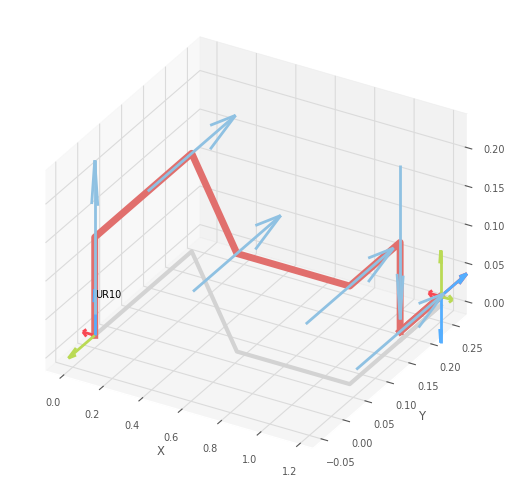

Swift backend, t = 0.05, scene:
  UR10

<Figure size 640x480 with 0 Axes>

In [12]:
#Se plotea la posicion inicial del UR10
UR10.plot(UR10.qz,backend="pyplot")
UR10.plot(UR10.qz,backend="swift")


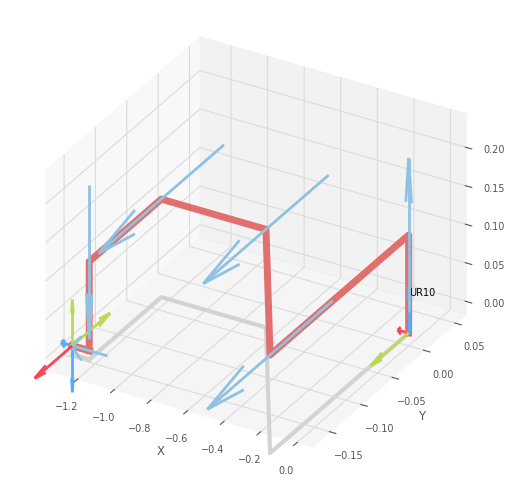

Swift backend, t = 0.05, scene:
  UR10

<Figure size 640x480 with 0 Axes>

In [13]:
#Se plotea la otra posicion a traves de la articulacion qr dada por la libreria

UR10.plot(UR10.qr,backend="pyplot")
UR10.plot(UR10.qr,backend="swift")

### Trayectoria

In [6]:
#Se hace la taryectoria 
t = np.linspace(0, 1, 15) 
traj = jtraj(UR10.qz, UR10.qr, t) #Trayectoria desde una articulacion inicial a otra articulacion
times = traj.t
configurations = traj.q 

In [7]:
for i in range(len(times)):
    print(f"Tiempo: {times[i]}, Configuración: {configurations[i]}")
#Con este ciclo se imprime cada paso con su respectiva configuracion de articulaciones
    

Tiempo: 0.0, Configuración: [0. 0. 0. 0. 0. 0.]
Tiempo: 0.07142857142857142, Configuración: [0.01025733 0.         0.         0.         0.00512866 0.        ]
Tiempo: 0.14285714285714285, Configuración: [0.07308638 0.         0.         0.         0.03654319 0.        ]
Tiempo: 0.21428571428571427, Configuración: [0.21827779 0.         0.         0.         0.1091389  0.        ]
Tiempo: 0.2857142857142857, Configuración: [0.45459352 0.         0.         0.         0.22729676 0.        ]
Tiempo: 0.3571428571428571, Configuración: [0.77397258 0.         0.         0.         0.38698629 0.        ]
Tiempo: 0.42857142857142855, Configuración: [1.15573674 0.         0.         0.         0.57786837 0.        ]
Tiempo: 0.5, Configuración: [1.57079633 0.         0.         0.         0.78539816 0.        ]
Tiempo: 0.5714285714285714, Configuración: [1.98585591 0.         0.         0.         0.99292796 0.        ]
Tiempo: 0.6428571428571428, Configuración: [2.36762008 0.         0.       

### Trayectoria Cartesiana

In [8]:
t = np.linspace(0, 1, 15)
tacc = 0.1 #Aceleracion
pos_0= UR10.fkine(UR10.qz) #Se aplica la cinematica directa a la articulacion inicial
pos_1 = UR10.fkine(UR10.qr)

In [9]:
cetraj = ctraj(pos_0, pos_1, t)
times = t
poses = cetraj
configurations = cetraj.t  
#Se hace la trayectoria con la cinematica directa de las articulaciones 

In [10]:
for i in range(len(times)):
    print(f"Tiempo: {times[i]}")
    print("Pose: ")
    print(poses[i])
    print(f"configurations: {configurations[i]}")

Tiempo: 0.0
Pose: 
   0         1         0         1.184     
   1         0         0         0.2561    
   0         0        -1         0.0116    
   0         0         0         1         

configurations: [1.1843   0.256141 0.0116  ]
Tiempo: 0.07142857142857142
Pose: 
   0.05407   0.9985    0         1.156     
   0.9985   -0.05407   0         0.2513    
   0         0        -1         0.0116    
   0         0         0         1         

configurations: [1.15605102 0.25131863 0.0116    ]
Tiempo: 0.14285714285714285
Pose: 
   0.2147    0.9767    0         1.071     
   0.9767   -0.2147    0         0.2369    
   0         0        -1         0.0116    
   0         0         0         1         

configurations: [1.07130408 0.23685152 0.0116    ]
Tiempo: 0.21428571428571427
Pose: 
   0.4679    0.8838    0         0.9301    
   0.8838   -0.4679    0         0.2127    
   0         0        -1         0.0116    
   0         0         0         1         

configurations: [0.93

### Trayectoria de movimiento

In [11]:
metraj = mtraj(quintic, UR10.qz, UR10.qr, t)#Se toma la funcion quintic o trapezoidal como primer parametro
times = metraj.t
configurations = metraj.q

for i in range(len(times)):
    print(f"Tiempo: {times[i]}, Configuración: {configurations[i]}")

Tiempo: 0.0, Configuración: [-8.96507967e-14  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.48253983e-14  0.00000000e+00]
Tiempo: 0.07142857142857142, Configuración: [0.01025733 0.         0.         0.         0.00512866 0.        ]
Tiempo: 0.14285714285714285, Configuración: [0.07308638 0.         0.         0.         0.03654319 0.        ]
Tiempo: 0.21428571428571427, Configuración: [0.21827779 0.         0.         0.         0.1091389  0.        ]
Tiempo: 0.2857142857142857, Configuración: [0.45459352 0.         0.         0.         0.22729676 0.        ]
Tiempo: 0.3571428571428571, Configuración: [0.77397258 0.         0.         0.         0.38698629 0.        ]
Tiempo: 0.42857142857142855, Configuración: [1.15573674 0.         0.         0.         0.57786837 0.        ]
Tiempo: 0.5, Configuración: [1.57079633 0.         0.         0.         0.78539816 0.        ]
Tiempo: 0.5714285714285714, Configuración: [1.98585591 0.         0.         0.         0.99292796 0.      